# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("Data loaded")

Data loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [None, 32, 32, 3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [None, 32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

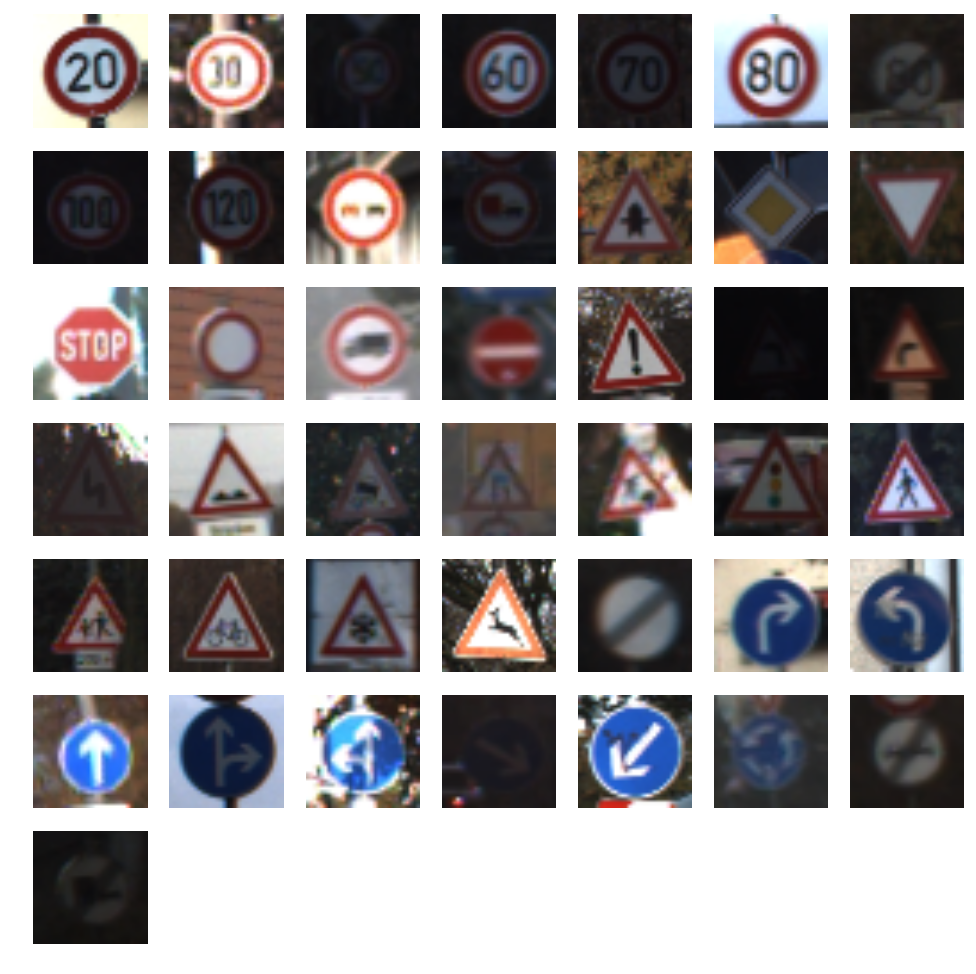

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def getRandomImages(sourceList, sampleSize):
    idx = np.random.choice(len(sourceList), size=sampleSize, replace=False)
    result=[]
    for id in idx:
        result.append(sourceList[id])
    return result

def plotImages(imageList):
    fig = plt.figure(figsize=(12,12))
    count = 1
    for image in imageList:
        #ax = fig.add_subplot(1, len(imageList), count)
        ax = fig.add_subplot(7, 7, count)
        imgplot = plt.imshow(image)#, cmap='gnuplot2')
        ax.axis('off')
        count = count + 1
    plt.show()

imgset_of_each_class = []
for i in range(n_classes):
    images_of_class = X_train[i == y_train]
    examples_per_class = len(images_of_class)
    random_index = int(np.random.uniform() * examples_per_class)
    imgset_of_each_class.append(images_of_class[random_index])
    
plotImages(imgset_of_each_class)

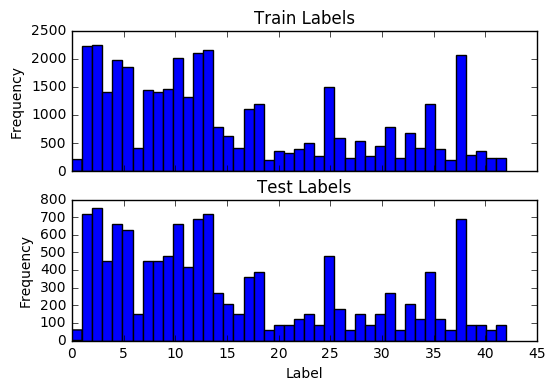

In [4]:
# Plot histogram of labels in training and test set
f, axarr = plt.subplots(2, sharex = True)

axarr[0].hist(y_train, bins = n_classes)
axarr[0].set_title('Train Labels')
axarr[0].set_ylabel('Frequency')

axarr[1].hist(y_test, bins = n_classes)
axarr[1].set_title('Test Labels')
axarr[1].set_xlabel('Label')
axarr[1].set_ylabel('Frequency')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def normalizeImage(image_data):
    a=0.1
    b=0.9
    gray_min=0.
    gray_max=255.
    image_data = image_data.astype('float_')
    for n in np.nditer(image_data,op_flags=['readwrite']):
        n[...] = a + (((n - gray_min) * (b - a)) / (gray_max - gray_min))
    return image_data

def grayscaleAndNormalize(feature_set):
    feature_set = [normalizeImage(grayscale(features)) for features in feature_set]
    return feature_set

#convert data to greyscale
#X_train_normalized = grayscaleAndNormalize(train_samples)
#X_test_normalized = grayscaleAndNormalize(test_samples)
#print("Grayscale and normalized train image:")
#plt.imshow(X_train_normalized[0], cmap='gray')

#X_train = grayscaleAndNormalize(X_train)
#print("Grayscale and normalized train image:")
#plt.imshow(X_train[0], cmap='gray')

##X_train = normalizeImage(X_train)
##X_test = normalizeImage(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**



D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Augmented training set length: 104680
Number of validation examples: 26170


(array([ 2557.,  2485.,  2530.,  2446.,  2278.,  2440.,  2382.,  2405.,
         2338.,  2562.,  2414.,  2326.,  2513.,  2544.,  2364.,  2438.,
         2533.,  2274.,  2436.,  2264.,  2269.,  2425.,  2363.,  2438.,
         2410.,  2471.,  2507.,  2422.,  2344.,  2498.,  2346.,  2532.,
         2516.,  2504.,  2479.,  2463.,  2494.,  2410.,  2564.,  2428.,
         2488.,  2532.,  2248.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

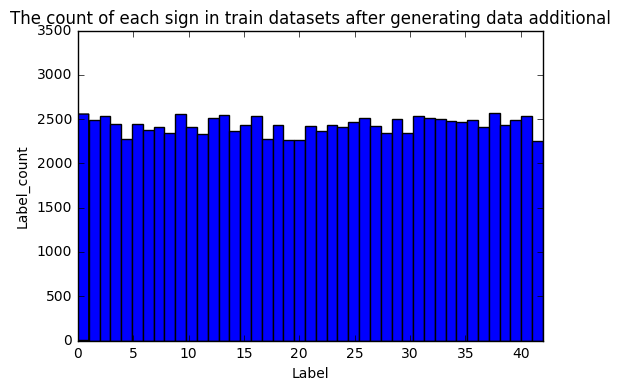

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import random
from scipy import ndimage as ndi

def rotate(img, degrees=180):
    rotate_angle = np.random.uniform(degrees)-degrees/2
    return ndi.rotate(img, rotate_angle, reshape=False)


inputs_per_class = np.bincount(y_train)
# each class will have 2800-3200 training examples 
for i in range(len(inputs_per_class)):
    add_number = 3000 + random.randint(-200, 200) - inputs_per_class[i]
    
    new_features = []
    new_labels = []
    mask = np.where(y_train == i)
    features = X_train[mask]
    for j in range(add_number):
        index = random.randint(0, inputs_per_class[i] - 1)
        new_features.append(rotate(features[index],30))
        new_labels.append(i)
    X_train = np.append(X_train, new_features, axis=0)
    y_train = np.append(y_train, new_labels, axis=0)
del new_features, new_labels


# Get randomized datasets for training and validation
from sklearn.utils import shuffle

from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=36452)

print("Augmented training set length:", len(X_train))
print("Number of validation examples:", len(X_validation))

# Plot the count of each sign in train datasets after generating data additiona    
plt.figure(4)
plt.xlabel('Label')
plt.ylabel('Label_count')
plt.axis([0, 42, 0, 3500])
plt.title('The count of each sign in train datasets after generating data additional')
plt.hist(y_train, n_classes)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Generated additional training data to balance it. Training examples for each class will have ~3000 -+ 200 data.

Then, rotated these added data in range -15/+15 degrees to give tiny perturbance to the images.

After adding the augmented data, %20 of the training data is selected for validation. The original test data is kept as is.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    #drop out
    #conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 45.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 45), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(45))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 45)

In [9]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I've used LeNet architecture with the following layers:

Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x6.

Activation. ReLU activation function.

Pooling. Max pooling Output: 14x14x6

Layer 2: Convolutional. Output: 10x10x16.

Activation. ReLU activation function.

Pooling. The output shape should be 5x5x16.

Flatten. 

Layer 3: Fully Connected. This should have 120 outputs.

Activation. ReLU activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. ReLU activation function.

Layer 5: Fully Connected (Logits). This should have 45 outputs.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './tsc')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.921

EPOCH 2 ...
Validation Accuracy = 0.945

EPOCH 3 ...
Validation Accuracy = 0.962

EPOCH 4 ...
Validation Accuracy = 0.966

EPOCH 5 ...
Validation Accuracy = 0.972

EPOCH 6 ...
Validation Accuracy = 0.971

EPOCH 7 ...
Validation Accuracy = 0.983

EPOCH 8 ...
Validation Accuracy = 0.985

EPOCH 9 ...
Validation Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.968

Model saved


In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("evaluate for test_accuracy completed...")
    print("Test Accuracy = {:.3f}".format(test_accuracy))

evaluate for test_accuracy completed...
Test Accuracy = 0.890


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the ADAM Optimizer and learning rate of 0.001.

I selected batch size of 128.

I selected number of epochs 10.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

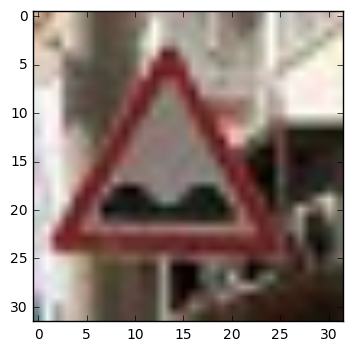

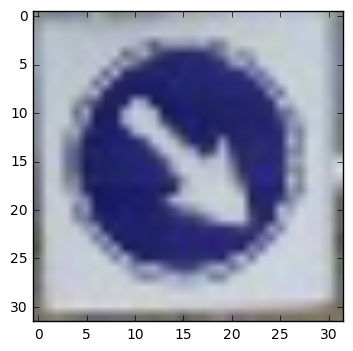

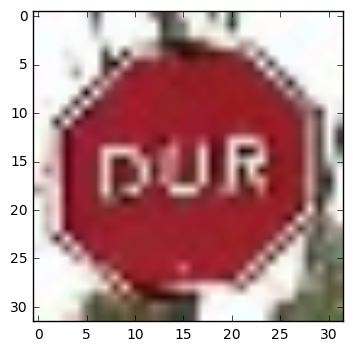

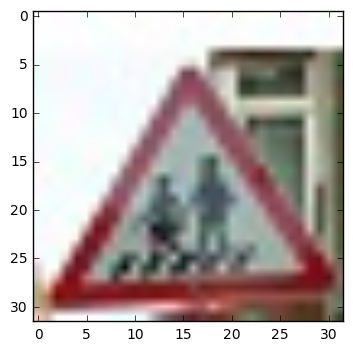

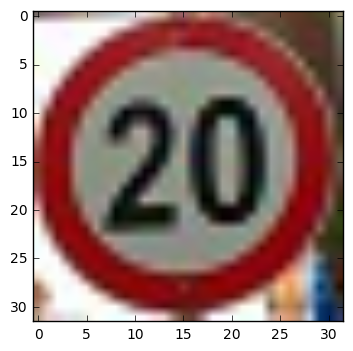

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

extra_signs = ['bumpy.jpg','right.jpg','stop.jpg','pedestrians.jpg','speed_limit_20.jpg']

test_images = []
for imgname in extra_signs:
    image = mpimg.imread('extra_signs/' + imgname)
    #image = image.resize((32,32))
    #image = np.asarray(image)
    test_images.append(image)
    plt.imshow(image)
    plt.show()

#plotImages(test_images)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [29]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

#x = tf.placeholder(tf.float32, (None, 32, 32, 3))
#x = tf.placeholder("float32", [None, 32, 32, 3])
x = tf.placeholder("float", [None, 32, 32, 3])
#x = tf.placeholder('float')
new_saver = tf.train.import_meta_graph("tsc.meta")

sess = tf.Session()
new_saver.restore(sess, tf.train.latest_checkpoint('.'))

def features_from_image_path(image_path):
    img_data = mpimg.imread(image_path)
    #img_data = img_data.resize(32,32,3)
    #image = np.asarray(image)
    return np.array(img_data)

extra_signs = ['bumpy.jpg','right.jpg','stop.jpg','pedestrians.jpg','speed_limit_20.jpg']

for imgname in extra_signs:
    img_features = features_from_image_path('extra_signs/' + imgname)
    predicted_class = sess.run(tf.argmax(logits, 1), feed_dict={x:img_features})
    print("image: ", imgname," predicted class: ", predicted_class)

ValueError: Cannot feed value of shape (32, 32, 3) for Tensor 'Placeholder_30:0', which has shape '(?, 32, 32, 3)'

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

class_n = []
for x in range(43):
    class_n.append(x)
    
plt.figure(7,figsize=(18, 4))

plt.subplot(151)
plt.plot(class_n, my_prediction[0])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.subplot(152)
plt.plot(class_n, my_prediction[1])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.subplot(153)
plt.plot(class_n, my_prediction[2])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.subplot(154)
plt.plot(class_n, my_prediction[3])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.subplot(155)
plt.plot(class_n, my_prediction[4])
plt.xlabel('Label')
plt.ylabel('softmax probabilities')

plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
#open and read signnames.csv
import csv
k = 3
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    signnames = dict((rows[0],rows[1]) for rows in reader)
values, indices = sess.run(tf.nn.top_k(prediction, k), feed_dict={x: test_images, keep_prob: 1.0})
for i in range(len(values)):
    print()
    print("Top", k, "prediction for image",extra_signs[i])
    for j in range(k):
        print("{}={:.1f}%".format(signnames[str(indices[i,j])], values[i,j] * 100,))

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.